In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error

In [3]:
df = pd.read_excel(('C:/Users/poona/OneDrive/Documents/POONAM/QUARTER 4/PREDICTIVE ANALYTICS/marketing_campaign.xlsx'),sheet_name = 'Sheet1') 
# importing data from sheet name "Data
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()     #checking datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isnull().sum()    #24 null values in 'Income' column

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
24/2240*100
#we have 1% of missing values in data. We can either remove it or we can replace it with median/mean value

1.0714285714285714

<AxesSubplot:xlabel='Income', ylabel='Count'>

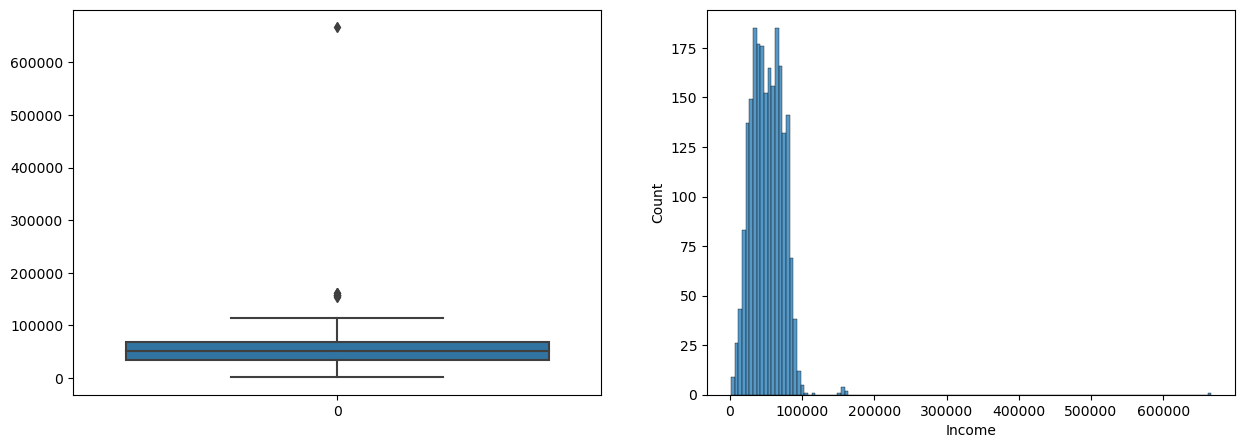

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df["Income"])
plt.subplot(1,2,2)
sns.histplot(df["Income"])

In [8]:
df['Income'] = df['Income'].fillna(value=df["Income"].median())     #imputing median 
df.isnull().sum()    #verifying null values

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
list(df.columns)   #Analyzing the columns

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [10]:
#We are observing some unnecessary columns in the data. Hence, we are dropping the columns. 
df = df.drop(['ID','Year_Birth','Dt_Customer'], axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [12]:
df.Kidhome.value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [13]:
# Coverted the categorical variables to dummy variables
df = pd.get_dummies(df, 
        columns=['Education','Marital_Status'])

In [14]:
#Separating the independent variables and dependent variable into separate data frames
y = df['Response']
x = df.drop(['Response'], axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
#creating constant and running the model
x_df = sm.add_constant(x)
modelResult = sm.Logit(y, x_df)
modelFit = modelResult.fit()
print(modelFit.summary())

Optimization terminated successfully.
         Current function value: 0.270856
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2207
Method:                           MLE   Df Model:                           32
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                  0.3569
Time:                        17:29:31   Log-Likelihood:                -606.72
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                3.940e-121
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Income                  -5.673e-06   7.69e-06     -0.738      0.461   -2.07e-05  

In [17]:
pValue = pd.DataFrame(modelFit.pvalues, columns=['pValue'])
coef = pd.DataFrame(modelFit.params, columns= ['coef'])
Log_Reg = pd.concat([pValue, coef], axis = 1)

In [18]:
Log_Reg = Log_Reg[(Log_Reg['pValue'] < 0.05) == True]
Log_Reg

,pValue,coef
Teenhome,3.204360e-06,-0.904027
Recency,5.573064e-23,-0.028387
MntMeatProducts,6.082347e-06,0.002200
MntGoldProds,4.435229e-02,0.003187
NumDealsPurchases,1.835897e-02,0.109729
NumWebPurchases,5.816690e-03,0.086572
NumCatalogPurchases,4.904180e-02,0.079109
NumStorePurchases,1.760632e-04,-0.126607
NumWebVisitsMonth,3.732436e-06,0.219436
AcceptedCmp3,1.980873e-15,1.749591


In [19]:
logReg = LogisticRegression(max_iter=100)
model = LogisticRegression(solver='liblinear',random_state=0).fit(x,y)
yPred=model.predict(x)
print("Confusion Matrix - ")
print(confusion_matrix(y, model.predict(x)))
print('Logistic Regression Accuracy - '+str(round(model.score(x, y)*100,2))+'%')

Confusion Matrix - 
[[1864   42]
 [ 281   53]]
Logistic Regression Accuracy - 85.58%


In [20]:
print('Accuracy: '+str(round(accuracy_score(y, yPred)*100,2))+'%')
print('Precision: '+str(round(precision_score(y, yPred)*100,2))+'%')
print('Recall: '+str(round(recall_score(y, yPred)*100,2))+'%')

Accuracy: 85.58%
Precision: 55.79%
Recall: 15.87%


In [21]:
svModel = SVC(kernel = 'linear')
svModel1 = svModel.fit(x, y)
svModel1
svPred = svModel1.predict(x)

In [24]:
print("Confusion Matrix - ")
print(confusion_matrix(y, svPred))
confusion_matrix(y, svModel1.predict(x))
print(classification_report(y, svPred))
print('SVM Accuracy - '+str(round(svModel1.score(x, y)*100,2))+'%')

Confusion Matrix - 
[[1851   55]
 [ 285   49]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1906
           1       0.47      0.15      0.22       334

    accuracy                           0.85      2240
   macro avg       0.67      0.56      0.57      2240
weighted avg       0.81      0.85      0.81      2240

SVM Accuracy - 84.82%
